In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",           
    password="meownigga@15",  
    database="sales_db"
)

cursor = conn.cursor()
print(" Connected to MySQL successfully!")


✅ Connected to MySQL successfully!


In [3]:
query1 = """
SELECT 
    SUM(quantity) AS total_quantity_sold,
    SUM(quantity * price) AS total_revenue
FROM sales;
"""

df_summary = pd.read_sql(query1, conn)
print("=== Sales Summary ===")
print(df_summary)


=== Sales Summary ===
   total_quantity_sold  total_revenue
0                 57.0       486500.0


C:\Users\jay shankar giri\AppData\Local\Temp\ipykernel_26992\3995518525.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_summary = pd.read_sql(query1, conn)


In [4]:
query2 = """
SELECT 
    product,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

df_product_revenue = pd.read_sql(query2, conn)
print("\n=== Revenue by Product ===")
print(df_product_revenue)



=== Revenue by Product ===
      product   revenue
0      Laptop  350000.0
1     Monitor   84000.0
2    Keyboard   22500.0
3  Headphones   20000.0
4       Mouse   10000.0


C:\Users\jay shankar giri\AppData\Local\Temp\ipykernel_26992\754634580.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product_revenue = pd.read_sql(query2, conn)


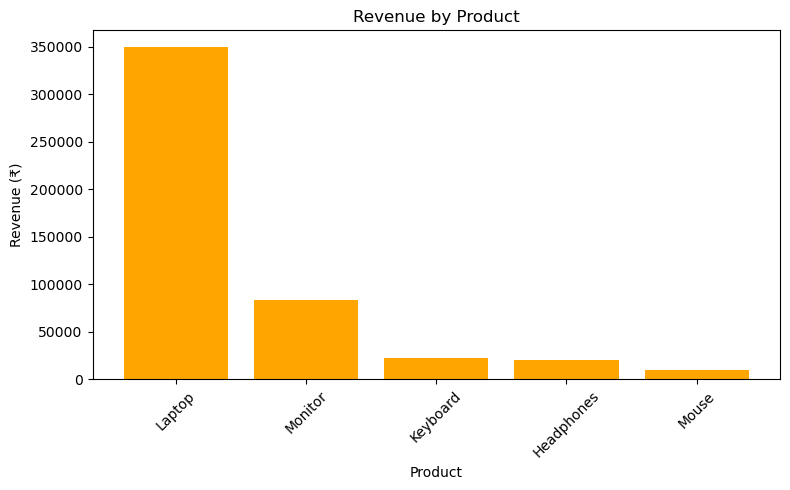

In [5]:
plt.figure(figsize=(8,5))
plt.bar(df_product_revenue['product'], df_product_revenue['revenue'], color='orange')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
cursor.close()
conn.close()
print(" Connection closed.")


🔒 Connection closed.
